In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# I imported all necessary libraries and modules i would be using for this process, 
# I would have imported all the libraries at once but for the sake of collaboration, I imported them as needed

In [2]:
sns.set({"figure.figsize": (20,20)})

# This I used to set my size of my diargrams which would be used later on in the code,
# for visualisation and storytelling purpose

In [3]:
startup = pd.read_csv(r"C:\Users\user\Downloads\Hamoye Project\startup data.csv")
startup.head()

# Next up, I used the read_csv function form pandas to view my data, 
# the head() function giving me accress to the first five rows of my datasets

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [4]:
startup.info()

# The info() function give me all the necessary information I need to have about all the features of my dataset
# e.g. The number of nan values in a column, the type of each column, the number of instances I have 
# and the memory the dataset uses in my storage disk

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [5]:
startup.columns

# This gave a list of all the columns in the startup dataset

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

In [6]:
for i in ['zip_code', 'id', "name", "Unnamed: 6", "city", "object_id", "state_code.1", 
           "Unnamed: 0", "longitude", "latitude", "labels"]:
    del startup[i]
    
    
# So after a very close crutiny at the dataset, I realised there were a lot of redundant columns that didn't 
# add an value to the target and to the whole objective at hand, and all these were based on personal opinion

# Zip_code, ID, Unnamed: 6, object_id, Unnamed: 0 : This doesn't have any relationship to whether a startup will succeed or fail

# Longitude, Latitude, city: This would still make inferences to the location of the place which we already have in terms of
#                         the state code column given.

# State_code.1 : This column 
# Labels: This were already dummy variables of the status of the company; closed or acquired. And since that was already 
#         given, this column was redundant\

# Closed_at: This is a column with a lot of missing values and even as this is still logical as 
#            successful startups will still be running in the present, There are little to no inferences that could be made with them

In [7]:
for i in ['founded_at', 'first_funding_at', 'last_funding_at', "closed_at"]:
    startup[i] = pd.to_datetime(startup[i])
    
# So as someone suggested, datetime was important and I had to read up how to work with datetime dtypes to do this
# This was just me converting them from the object dtype to datetime dtypes as they should be

In [8]:
categorical_feats = [i for i in startup.columns if startup[i].dtypes == "O"]
numerical_feats = [i for i in startup.columns if i not in categorical_feats]

# This seperated my columns of discrete nature from columns with numerical and continous values

In [9]:
for i in categorical_feats:
    print("The unique values in {} are {}".format(i, startup[i].unique()), end = "\n")
    print()
    
# This was to get the unqiue values in each categorical column that was in my dataset

The unique values in state_code are ['CA' 'MA' 'KY' 'NY' 'CO' 'VA' 'TX' 'WA' 'IL' 'NC' 'PA' 'GA' 'NH' 'MO'
 'FL' 'NJ' 'WV' 'MI' 'DC' 'CT' 'MD' 'OH' 'TN' 'MN' 'RI' 'OR' 'UT' 'ME'
 'NV' 'NM' 'IN' 'AZ' 'ID' 'AR' 'WI']

The unique values in category_code are ['music' 'enterprise' 'web' 'software' 'games_video' 'network_hosting'
 'finance' 'mobile' 'education' 'public_relations' 'security' 'other'
 'photo_video' 'hardware' 'ecommerce' 'advertising' 'travel' 'fashion'
 'analytics' 'consulting' 'biotech' 'cleantech' 'search' 'semiconductor'
 'social' 'medical' 'automotive' 'messaging' 'manufacturing' 'hospitality'
 'news' 'transportation' 'sports' 'real_estate' 'health']

The unique values in status are ['acquired' 'closed']



In [10]:
startup.columns

# This was to access the columns list again to see what I am working with

Index(['state_code', 'founded_at', 'closed_at', 'first_funding_at',
       'last_funding_at', 'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB',
       'has_roundC', 'has_roundD', 'avg_participants', 'is_top500', 'status'],
      dtype='object')

In [11]:
startup = pd.get_dummies(startup, columns = ["status"])

# This was to create dummies of the status column, turning the acquired into 1s and closed into 0s for easier operations

In [12]:
startup.head()

# This was to have a look at my dataset again

,state_code,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status_acquired,status_closed
0,CA,2007-01-01,NaT,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,3,...,0,1,0,0,0,0,1.0000,0,1,0
1,CA,2000-01-01,NaT,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,9,...,1,0,0,1,1,1,4.7500,1,1,0
2,CA,2009-03-18,NaT,2010-03-30,2010-03-30,1.0329,1.0329,1.4575,2.2055,5,...,0,0,1,0,0,0,4.0000,1,1,0
3,CA,2002-01-01,NaT,2005-02-17,2007-04-25,3.1315,5.3151,6.0027,6.0027,5,...,0,0,0,1,1,1,3.3333,1,1,0
4,CA,2010-08-01,2012-10-01,2010-08-01,2012-04-01,0.0000,1.6685,0.0384,0.0384,2,...,1,1,0,0,0,0,1.0000,1,0,1


In [13]:
del startup["status_closed"]
startup.rename(columns = {"status_acquired":"status"}, inplace = True)

# My dummies created two columns so I deleted one and renamed the other column to make the column names easier to handle

In [14]:
Nan_columns = [i for i in startup.columns if startup[i].isnull().sum() != 0]
Nan_columns

# This was to get columns with missing values

['closed_at', 'age_first_milestone_year', 'age_last_milestone_year']

In [15]:
for i in ['age_first_milestone_year', 'age_last_milestone_year']:
    startup[i] = startup[i].fillna(0)
    
# Started preprocessing by filling in my missing values with the mean of those columns

In [16]:
startup["diff_in_fundyears"] = startup["last_funding_at"] - startup["first_funding_at"]
startup["diff_in_fundyears"] = startup["diff_in_fundyears"] / np.timedelta64(1, "Y")

startup["Founded_year"] = pd.DatetimeIndex(startup["founded_at"]).year

# This might need to be explained in th meeting

In [17]:
startup["age_diff_in_milestone"] = startup["age_last_milestone_year"] - startup["age_first_milestone_year"]

# Same as cell above

In [18]:
startup.head()

# To have a view of my dataset again

,state_code,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,...,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,diff_in_fundyears,Founded_year,age_diff_in_milestone
0,CA,2007-01-01,NaT,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,3,...,0,0,0,0,1.0000,0,1,0.752924,2007,2.0356
1,CA,2000-01-01,NaT,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,9,...,0,1,1,1,4.7500,1,1,4.867999,2000,0.0000
2,CA,2009-03-18,NaT,2010-03-30,2010-03-30,1.0329,1.0329,1.4575,2.2055,5,...,1,0,0,0,4.0000,1,1,0.000000,2009,0.7480
3,CA,2002-01-01,NaT,2005-02-17,2007-04-25,3.1315,5.3151,6.0027,6.0027,5,...,0,1,1,1,3.3333,1,1,2.182112,2002,0.0000
4,CA,2010-08-01,2012-10-01,2010-08-01,2012-04-01,0.0000,1.6685,0.0384,0.0384,2,...,0,0,0,0,1.0000,1,0,1.667385,2010,0.0000


In [19]:
startup.info()

# To have an insight of the data at this point

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   state_code                923 non-null    object        
 1   founded_at                923 non-null    datetime64[ns]
 2   closed_at                 335 non-null    datetime64[ns]
 3   first_funding_at          923 non-null    datetime64[ns]
 4   last_funding_at           923 non-null    datetime64[ns]
 5   age_first_funding_year    923 non-null    float64       
 6   age_last_funding_year     923 non-null    float64       
 7   age_first_milestone_year  923 non-null    float64       
 8   age_last_milestone_year   923 non-null    float64       
 9   relationships             923 non-null    int64         
 10  funding_rounds            923 non-null    int64         
 11  funding_total_usd         923 non-null    int64         
 12  milestones            

In [20]:
startup.describe()

# This give statistical analysis to numerical columns telling their mean, std, min, max, etc.

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,...,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,diff_in_fundyears,Founded_year,age_diff_in_milestone
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,9.230000e+02,923.000000,923.000000,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,2.235630,3.931456,2.552196,3.971462,7.710726,2.310943,2.541975e+07,1.841820,0.527627,0.114843,...,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317,0.646804,1.694699,2005.496208,1.419266
std,2.510449,2.967910,2.947421,3.424843,7.265776,1.390922,1.896344e+08,1.322632,0.499507,0.319005,...,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052,0.478222,1.935245,3.528738,1.999443
min,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1984.000000,0.000000
25%,0.576700,1.669850,0.000000,1.000000,3.000000,1.000000,2.725000e+06,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000,0.000000,0.000000,2003.000000,0.000000
50%,1.446600,3.528800,2.000000,3.783600,5.000000,2.000000,1.000000e+07,2.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000,1.000000,1.084211,2006.000000,0.534200
75%,3.575350,5.560250,4.002700,6.039750,10.000000,3.000000,2.472500e+07,3.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000,1.000000,2.792665,2008.000000,2.186250
max,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000,1.000000,10.811995,2013.000000,16.378100


In [21]:
startup.corr()

# This was to check for closely related columns and since this is not a regression issue, I wasnt really bothered by which
# features correlated with my target, I just checked for correlations with one another

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,...,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,diff_in_fundyears,Founded_year,age_diff_in_milestone
age_first_funding_year,1.000000,0.762382,0.382395,0.236958,-0.187817,-0.155478,0.046350,-0.295894,-0.010800,-0.128102,...,-0.293081,-0.060532,0.033388,0.121338,0.114363,0.050638,-0.075637,-0.127944,-0.762626,-0.157811
age_last_funding_year,0.762382,1.000000,0.529763,0.436369,0.073080,0.385999,0.116371,-0.122905,0.006190,-0.143312,...,-0.099762,0.258928,0.317469,0.312340,0.122893,0.200727,0.073731,0.544266,-0.793388,-0.033480
age_first_milestone_year,0.382395,0.529763,1.000000,0.813272,0.310615,0.203653,0.063757,0.198468,0.042312,-0.063721,...,0.073806,0.195873,0.168593,0.224239,0.052237,0.168606,0.250163,0.316188,-0.473203,-0.081070
age_last_milestone_year,0.236958,0.436369,0.813272,1.000000,0.411711,0.257549,0.086555,0.543103,0.065809,-0.048850,...,0.170414,0.251696,0.208067,0.211145,0.072443,0.212903,0.358600,0.361591,-0.403687,0.514037
relationships,-0.187817,0.073080,0.310615,0.411711,1.000000,0.358883,0.093790,0.513835,0.105754,0.049912,...,0.317130,0.285015,0.259842,0.207488,0.115061,0.222207,0.360434,0.355481,0.016476,0.247335
funding_rounds,-0.155478,0.385999,0.203653,0.257549,0.358883,1.000000,0.115800,0.230162,0.010258,0.007431,...,0.260598,0.444454,0.440923,0.323620,0.043044,0.259345,0.206049,0.793134,-0.094448,0.140946
funding_total_usd,0.046350,0.116371,0.063757,0.086555,0.093790,0.115800,1.000000,0.012056,-0.027545,-0.024488,...,-0.023721,0.020119,0.045405,0.045146,0.046250,0.048978,0.040176,0.118264,-0.059259,0.054274
milestones,-0.295894,-0.122905,0.198468,0.543103,0.513835,0.230162,0.012056,1.000000,0.036172,0.104795,...,0.319986,0.195162,0.085329,0.020663,0.043533,0.171412,0.328260,0.195223,0.199491,0.637713
is_CA,-0.010800,0.006190,0.042312,0.065809,0.105754,0.010258,-0.027545,0.036172,1.000000,-0.380683,...,0.076151,0.093337,0.074752,0.083008,0.069158,0.098677,0.077217,0.023487,-0.015170,0.050351
is_NY,-0.128102,-0.143312,-0.063721,-0.048850,0.049912,0.007431,-0.024488,0.104795,-0.380683,1.000000,...,0.021334,-0.066628,-0.061830,-0.063132,0.068394,-0.015463,0.059996,-0.053572,0.174781,0.010258


<AxesSubplot:>

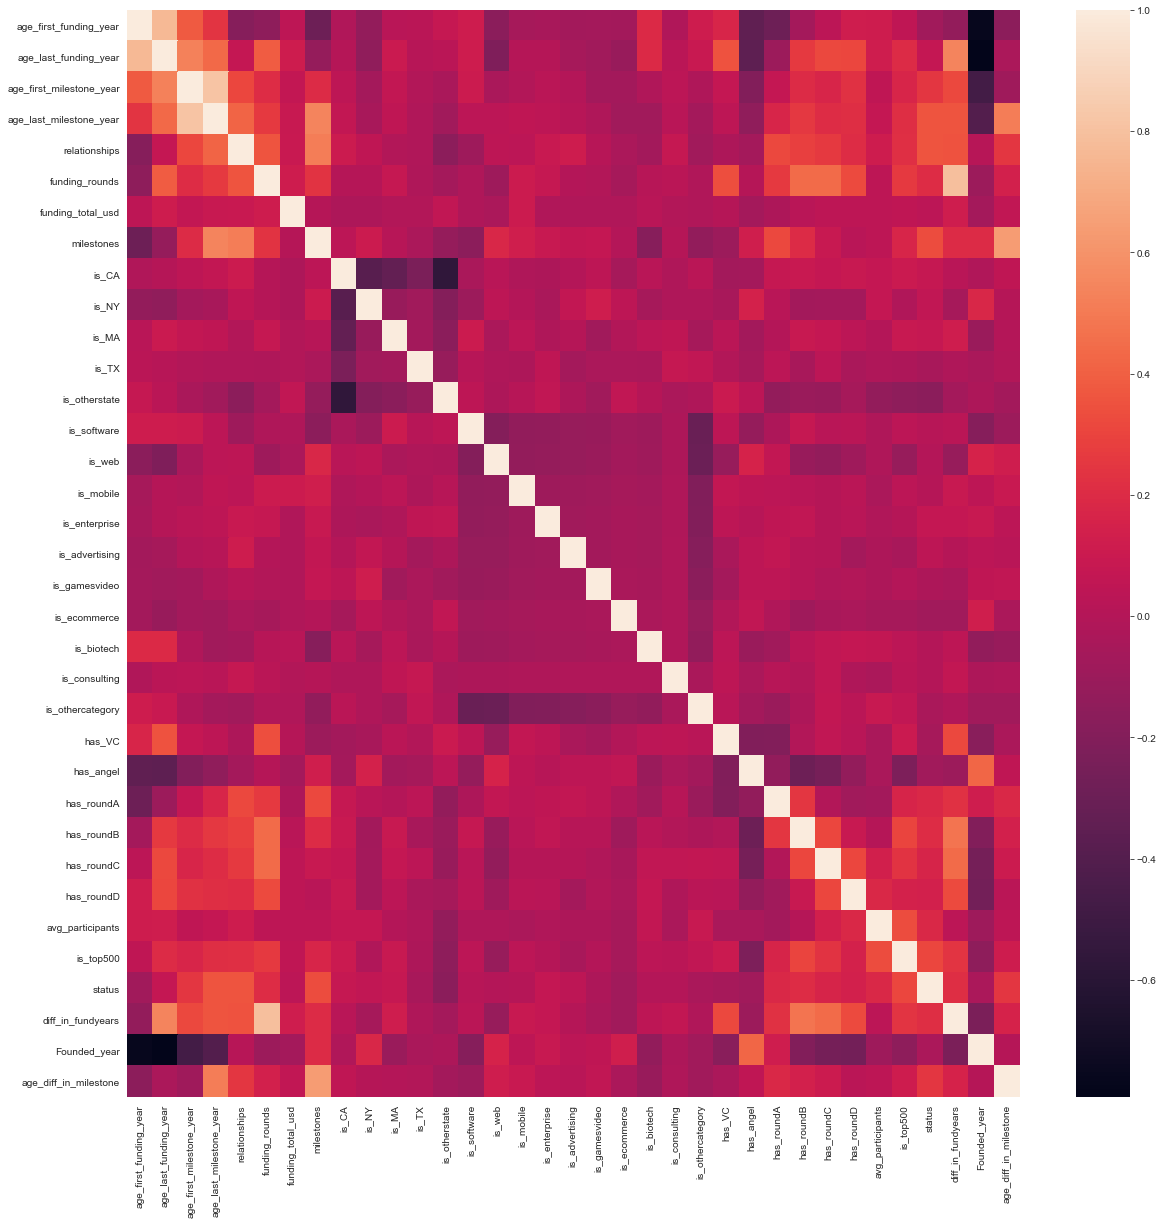

In [22]:
sns.heatmap(startup.corr())

# This plot made me discover that funding years, first and last as well as milestone years, first and last 
# had strong relationships with one another, Founded year, a new column i created also had a very stron relationship with the 
# aforementioned columns, funding rounds also had a strong relationship with diff in years, a column I created and others are 
# negligible.

<AxesSubplot:xlabel='status', ylabel='count'>

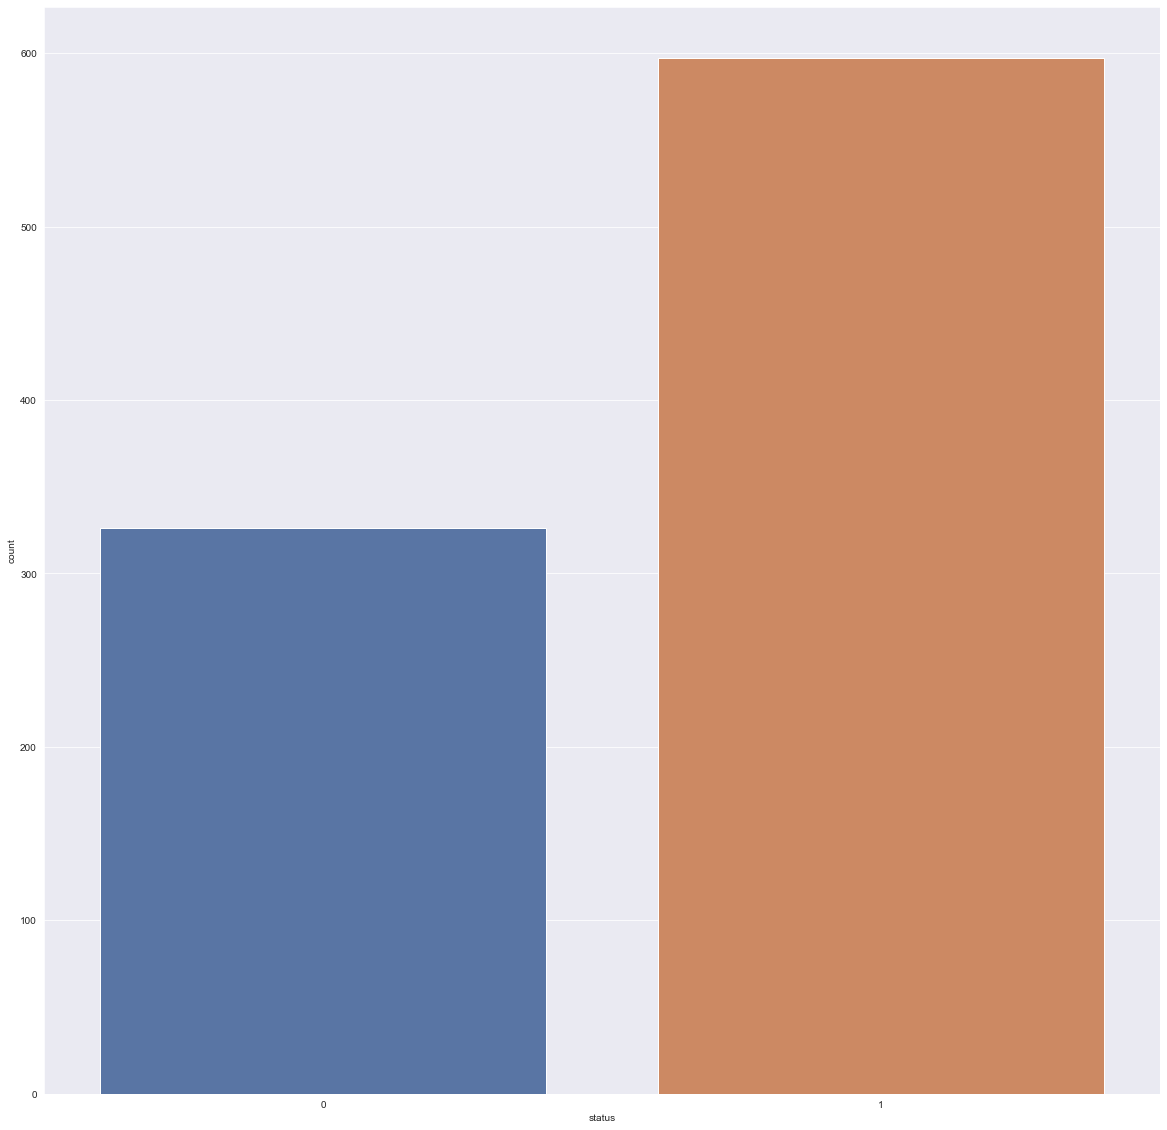

In [23]:
sns.countplot(x = "status", data = startup)

# From this we can infer that this is a balanced dataset and that there were more acquired startups than failed startups

<AxesSubplot:xlabel='is_top500', ylabel='count'>

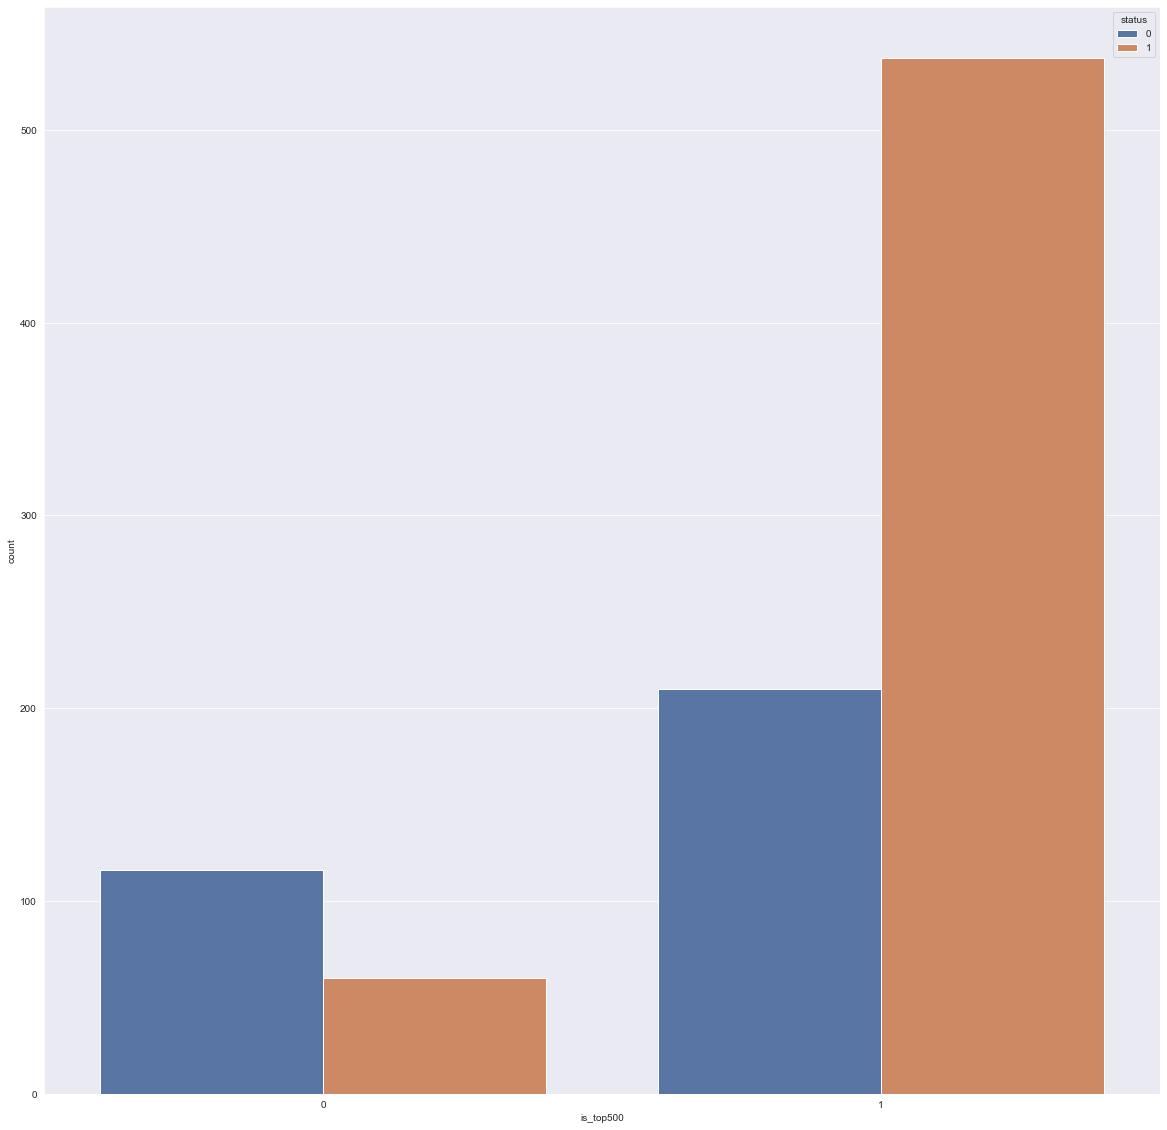

In [24]:
sns.countplot(x = "is_top500", data = startup, hue = "status")

<AxesSubplot:xlabel='funding_total_usd', ylabel='count'>

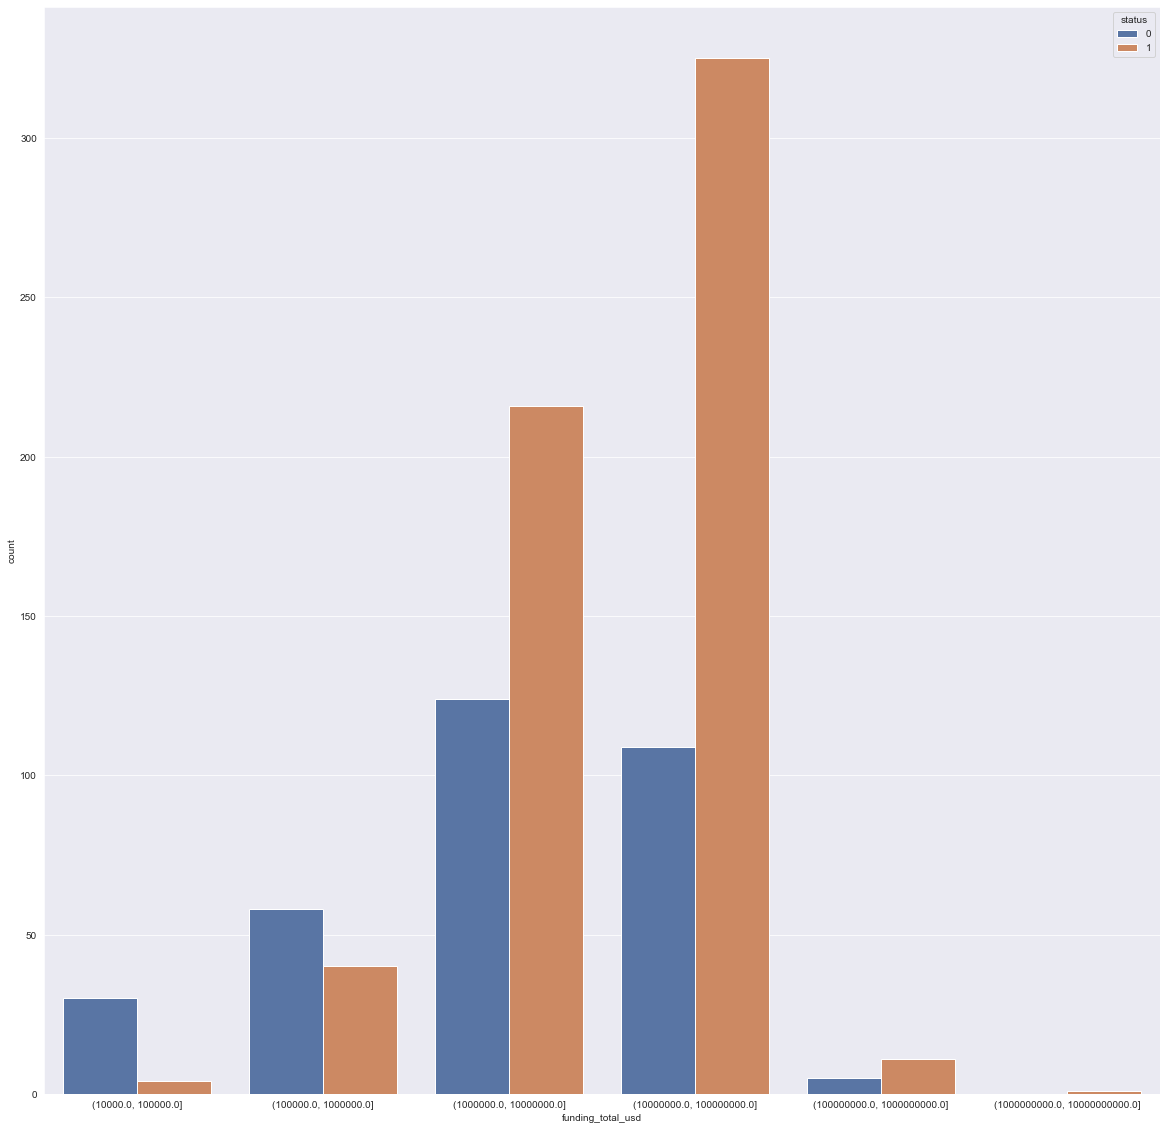

In [25]:
Funding_bins = pd.cut(startup["funding_total_usd"], [1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10])
sns.countplot(x = Funding_bins, data = startup, hue = "status")

# I tried to visualize the relationship between funding rounds and startup success. And it can be infered that startups with 
# $1e6 which is $1000000 have more successes than failures, with the most sucesses to startups with funding of about
# $10,000,000 to $100,000,000 in funds

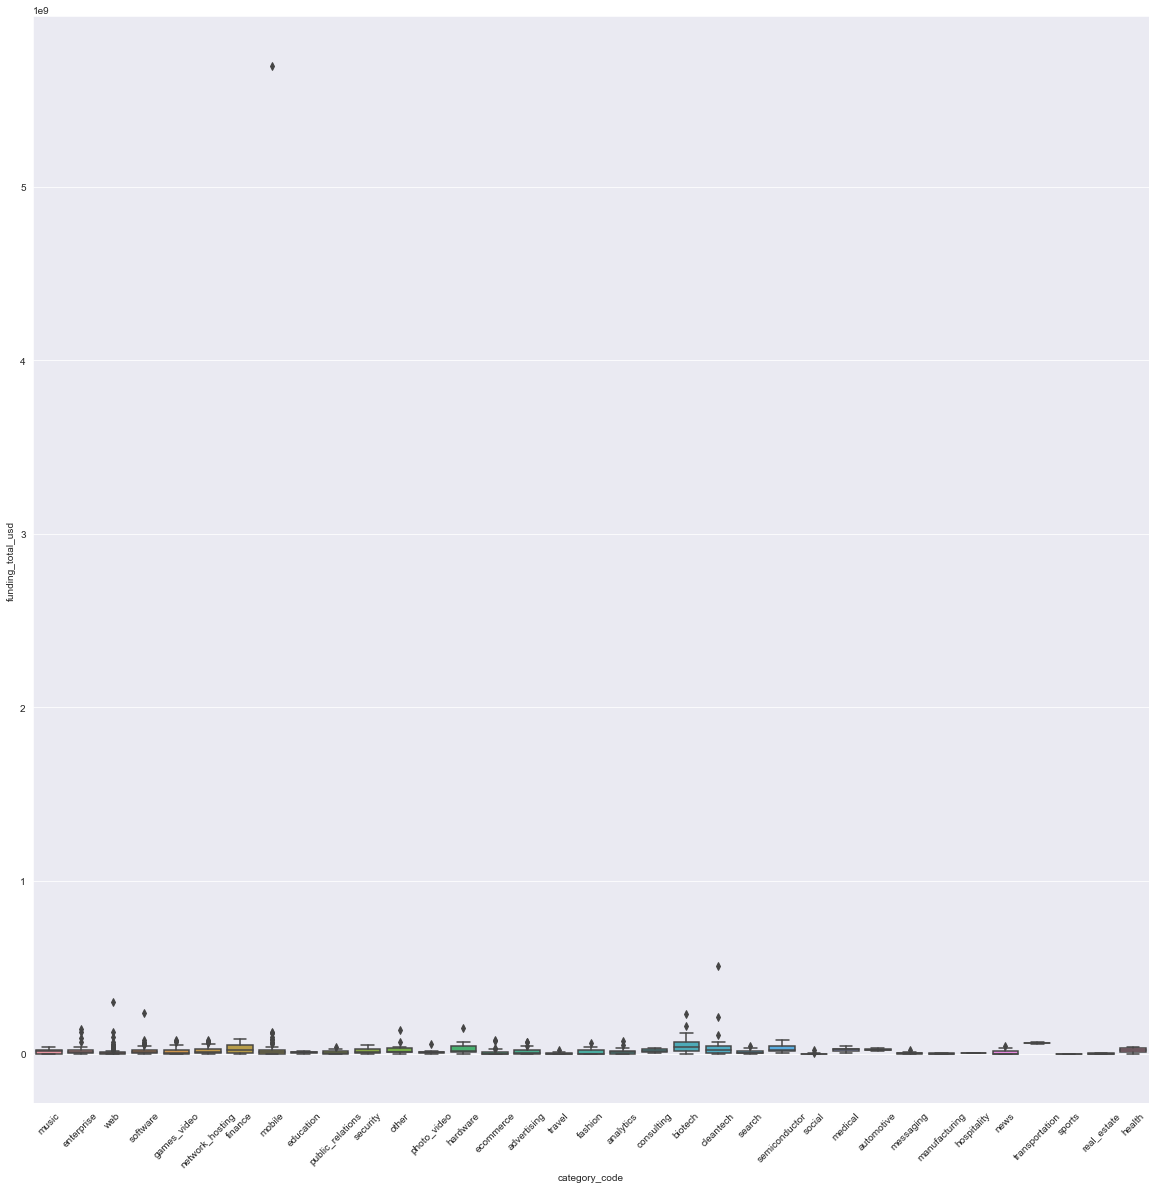

In [26]:
sns.boxplot(x = "category_code", y = "funding_total_usd", data = startup)
plt.xticks(rotation = 45)
plt.show()

# This boxplot showed the major outliers that existed in the data which is still a work in progress but majorly it showed that
# a startup in the mobile category had the largest funding as a startup, closely followed by deantech and then web

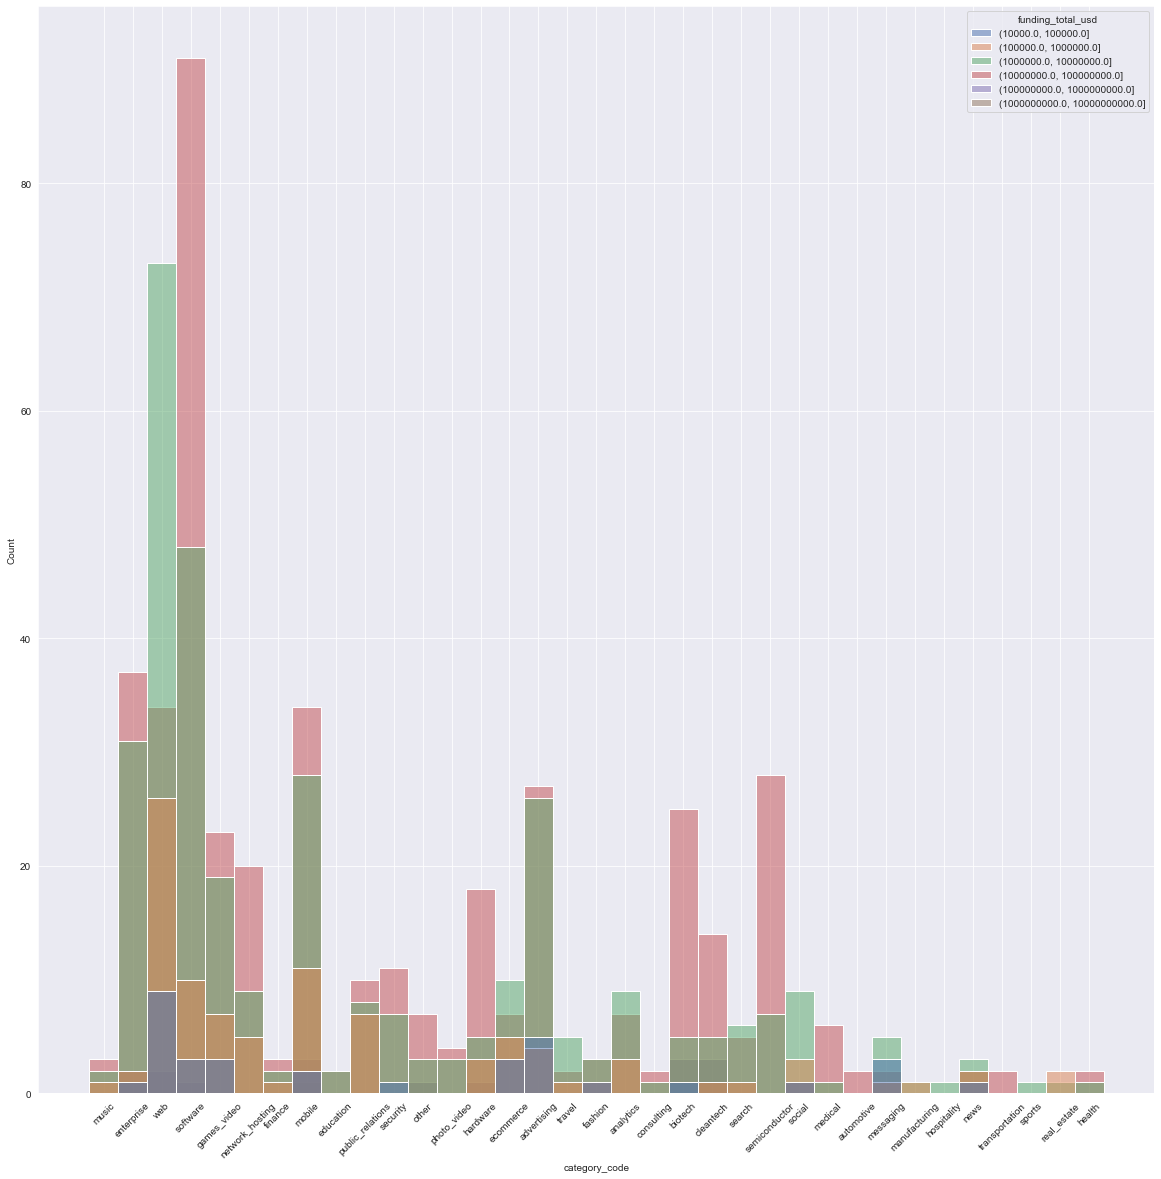

In [27]:
sns.histplot(x = "category_code", data = startup, hue = Funding_bins )
plt.xticks(rotation = 45)
plt.show()

<AxesSubplot:xlabel='Founded_year', ylabel='count'>

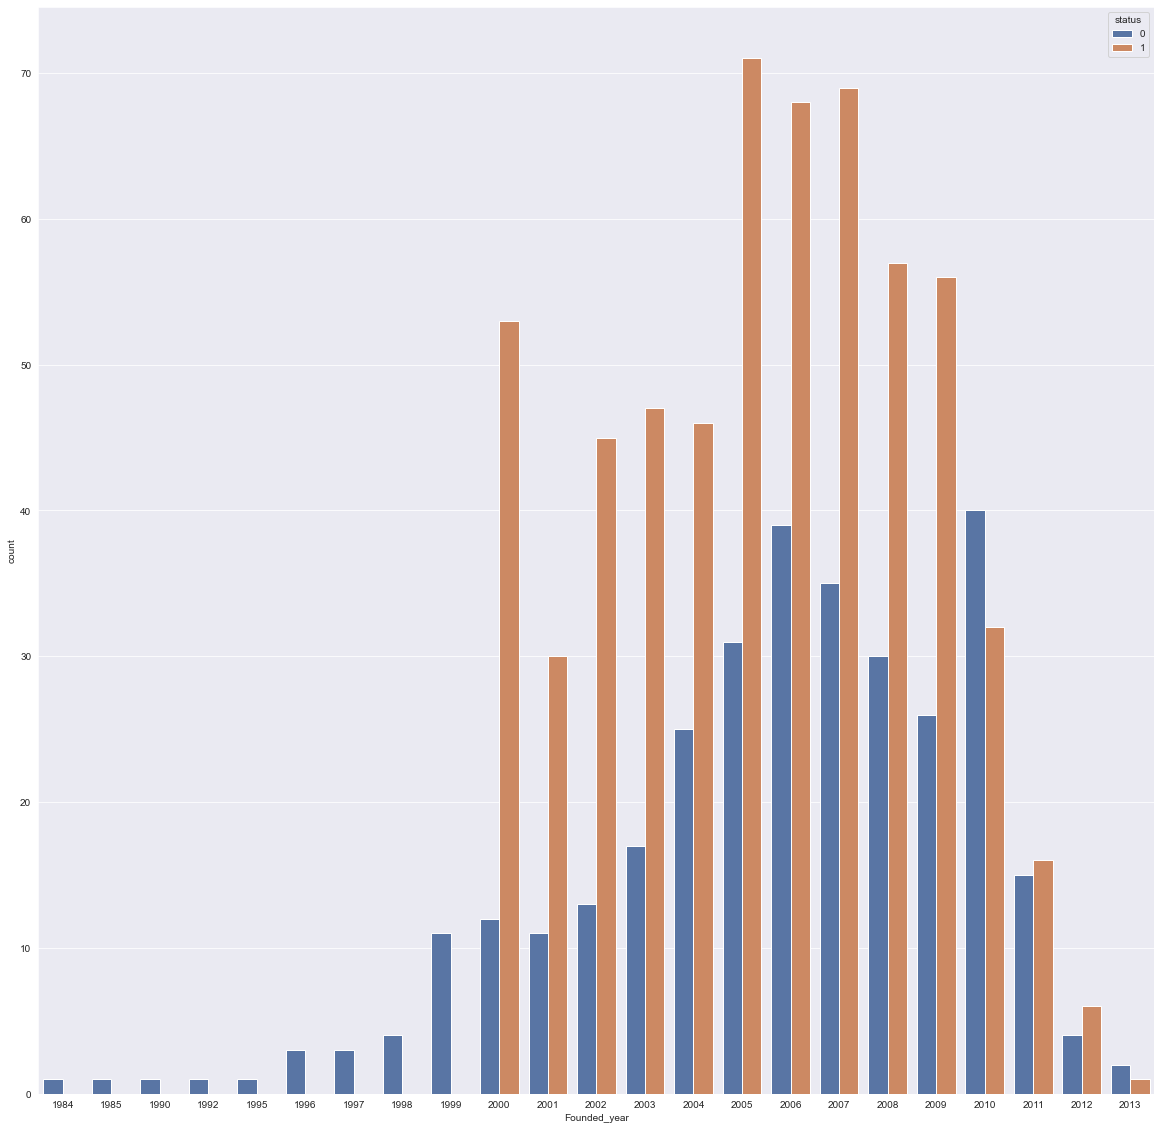

In [28]:
sns.countplot(x = "Founded_year", data = startup, hue = "status")

# With this plot we can infer that 2005 was a great founding year for startups, it could be due to some economic boom or 
# an increase in funding, closely followed by 2007 and 2006, it can also be infered that every year from 1984 to 1999, was 
# a failure and the highest failure of startups occurred in 2010, closely followed by 2006

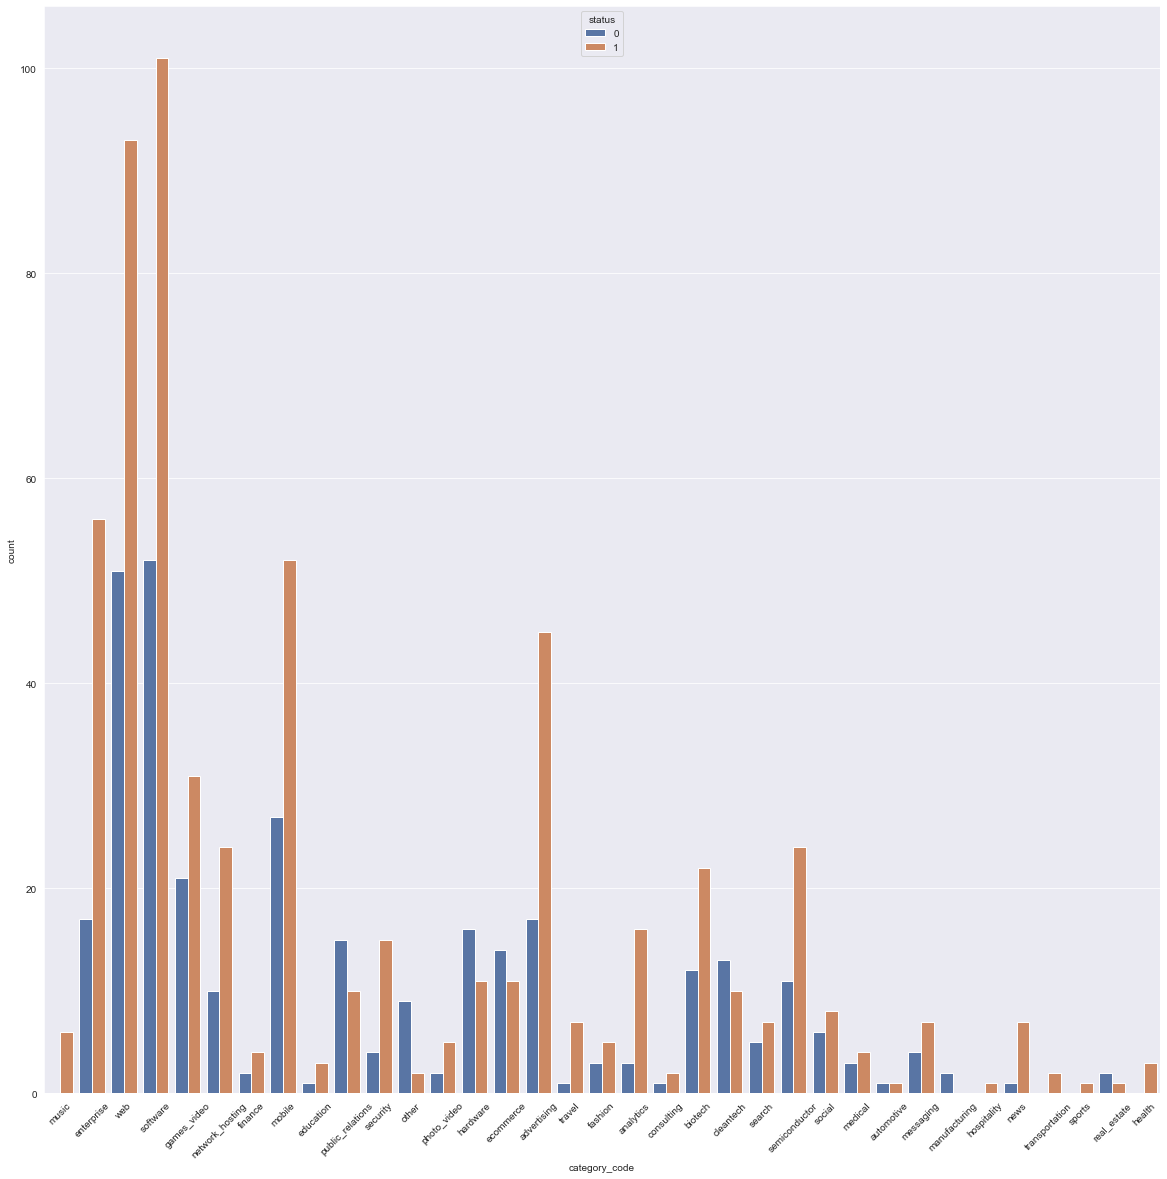

In [29]:
sns.countplot(x = "category_code", data = startup, hue = "status")
plt.xticks(rotation = 45)
plt.show()

# This plot shows that the most successful category code is software, followed by web and then enterprise 
# with the highest failures in software, web and then mobile. 

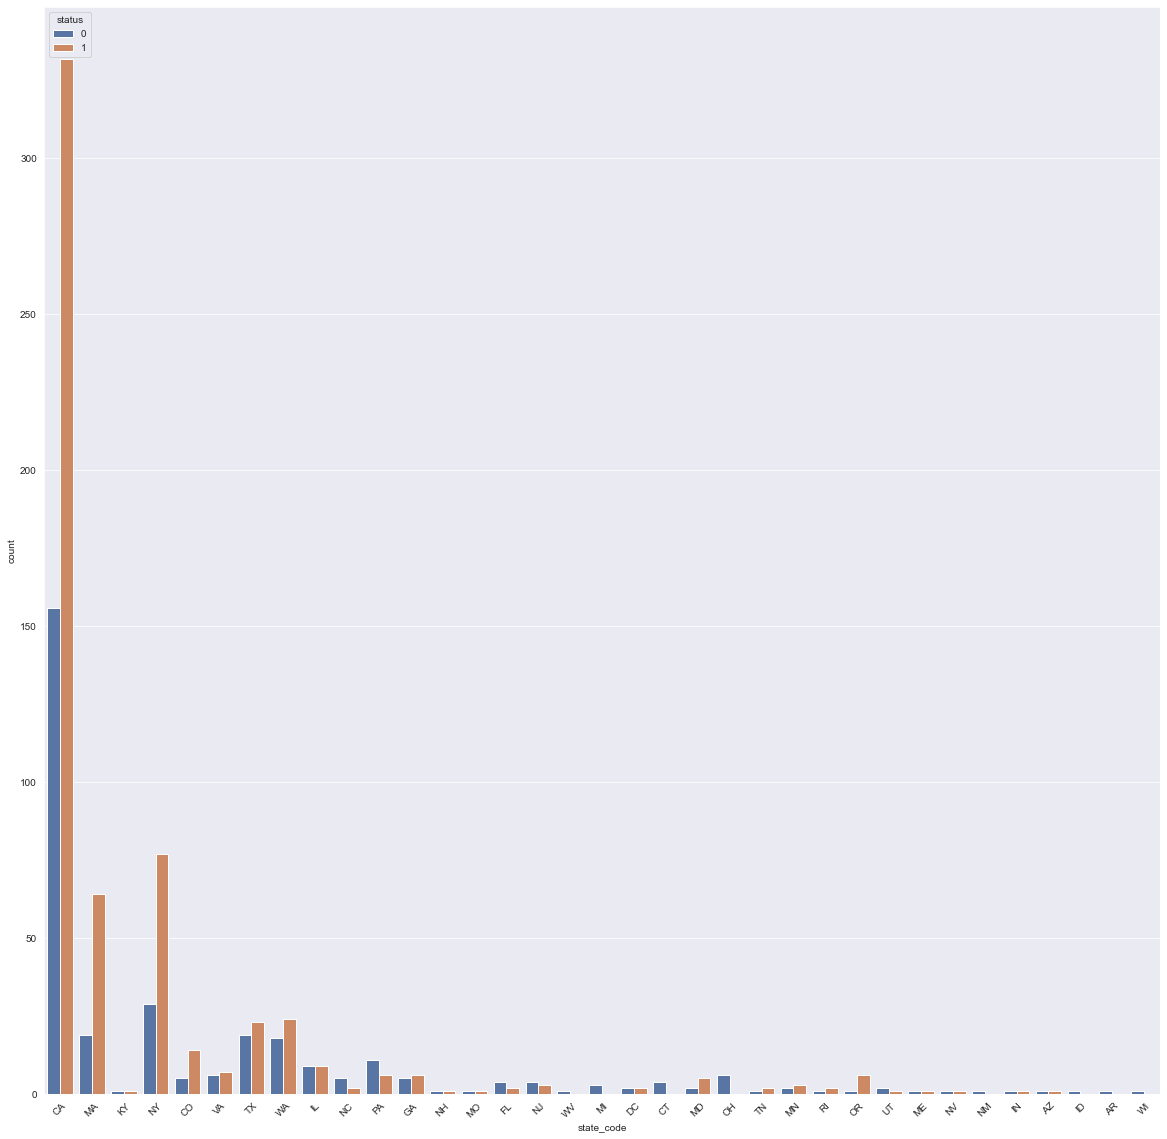

In [30]:
sns.countplot(x = "state_code", data = startup, hue = "status")
plt.xticks(rotation = 45)
plt.show()

# This shows a relationship between the statecode and success rates, each state code representing a state in the US. 
# With the highest startups is California, followed by New York and Massachusetts also withe highest number of failures 
# emanating in that same order.

<AxesSubplot:xlabel='has_VC', ylabel='count'>

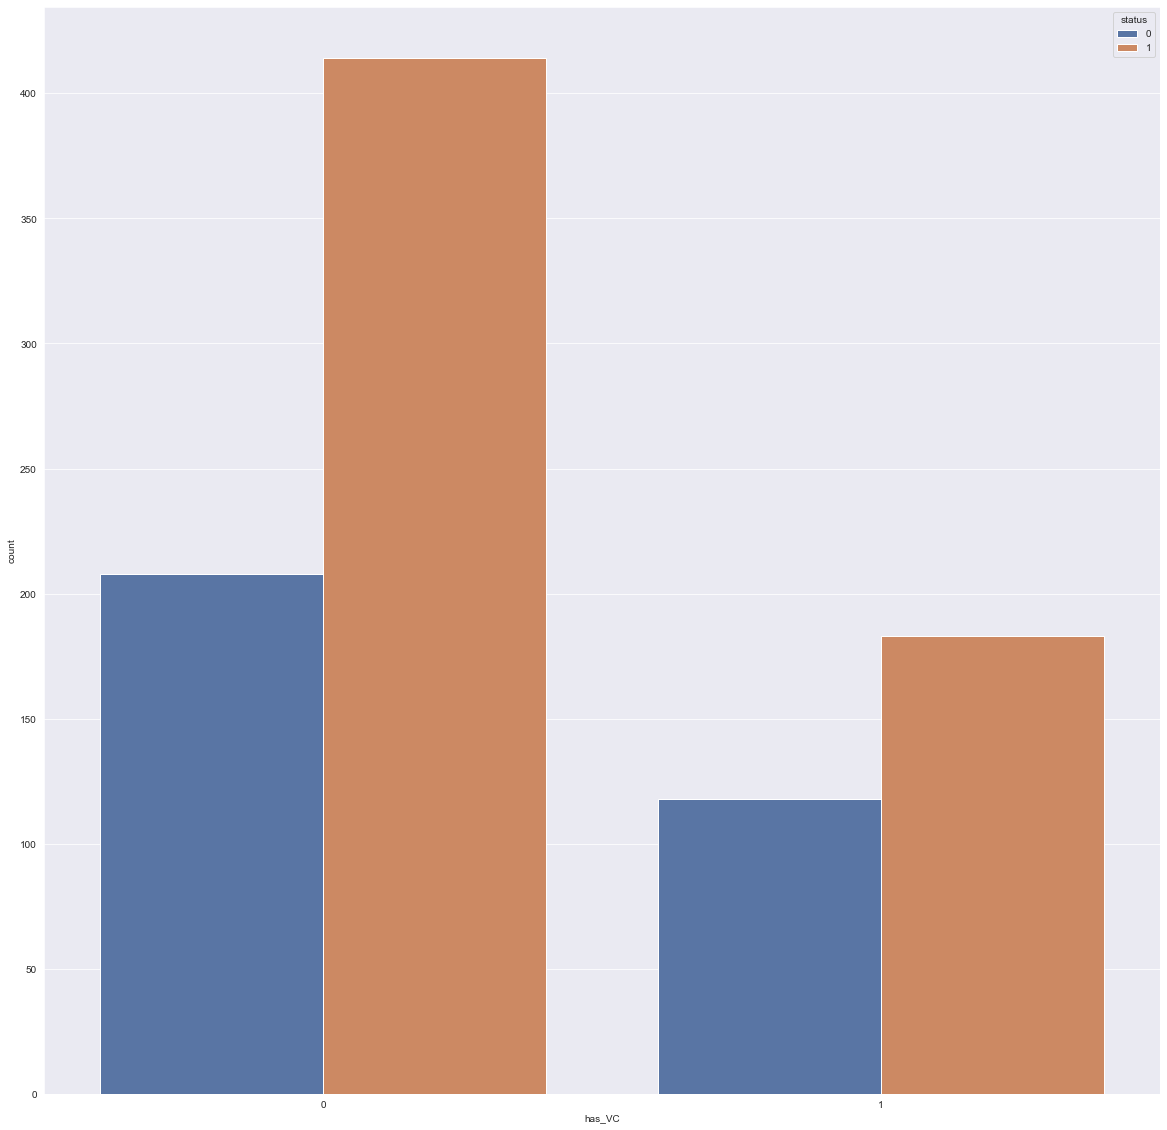

In [31]:
sns.countplot(x = "has_VC", data = startup, hue = "status")

<AxesSubplot:xlabel='has_angel', ylabel='count'>

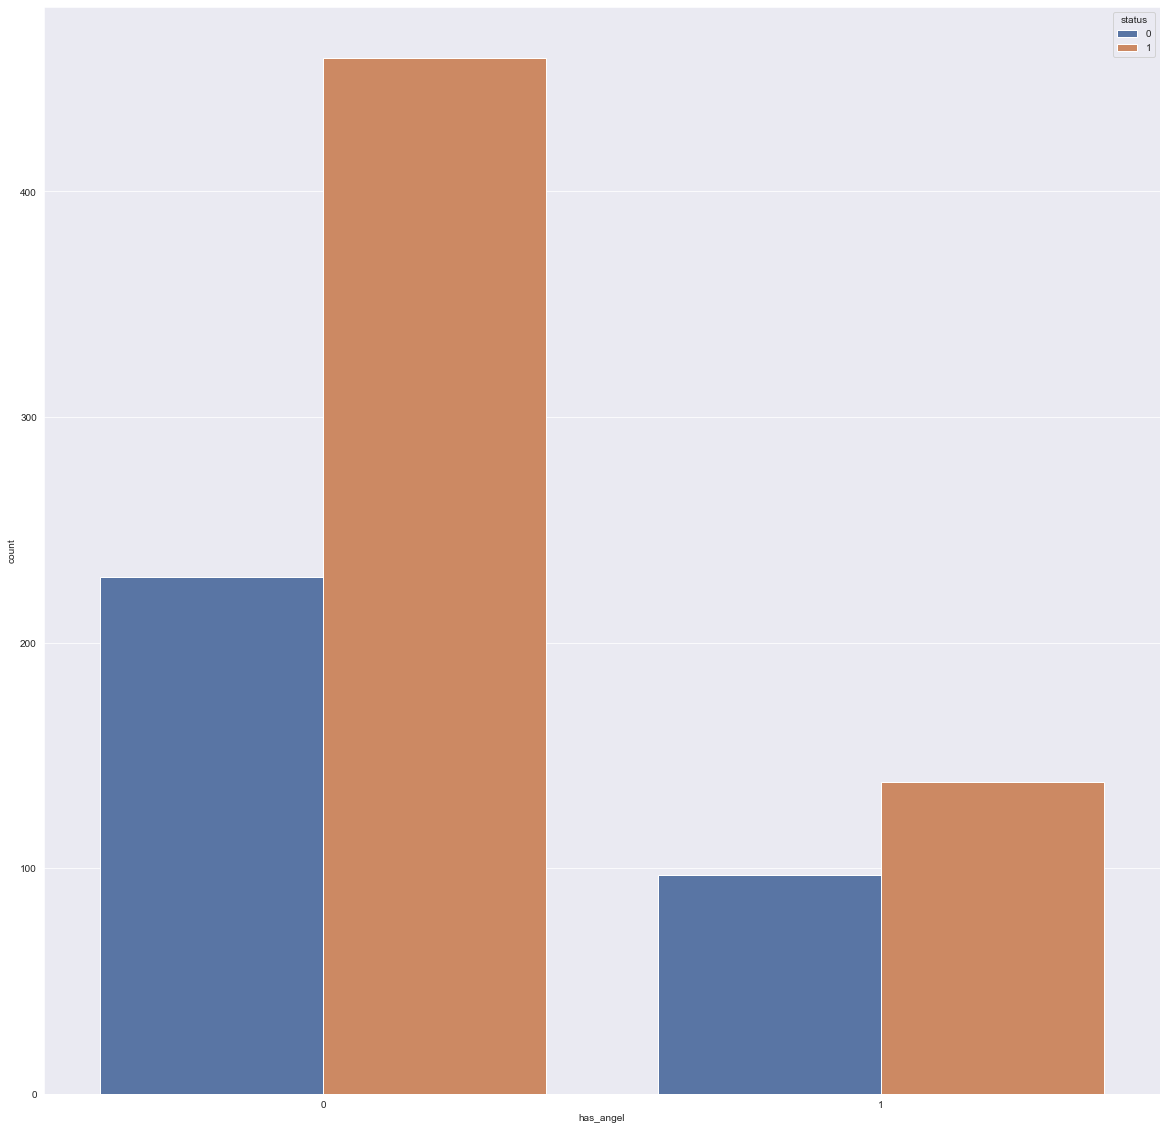

In [32]:
sns.countplot(x = "has_angel", data = startup, hue = "status")

<AxesSubplot:xlabel='age_first_funding_year', ylabel='count'>

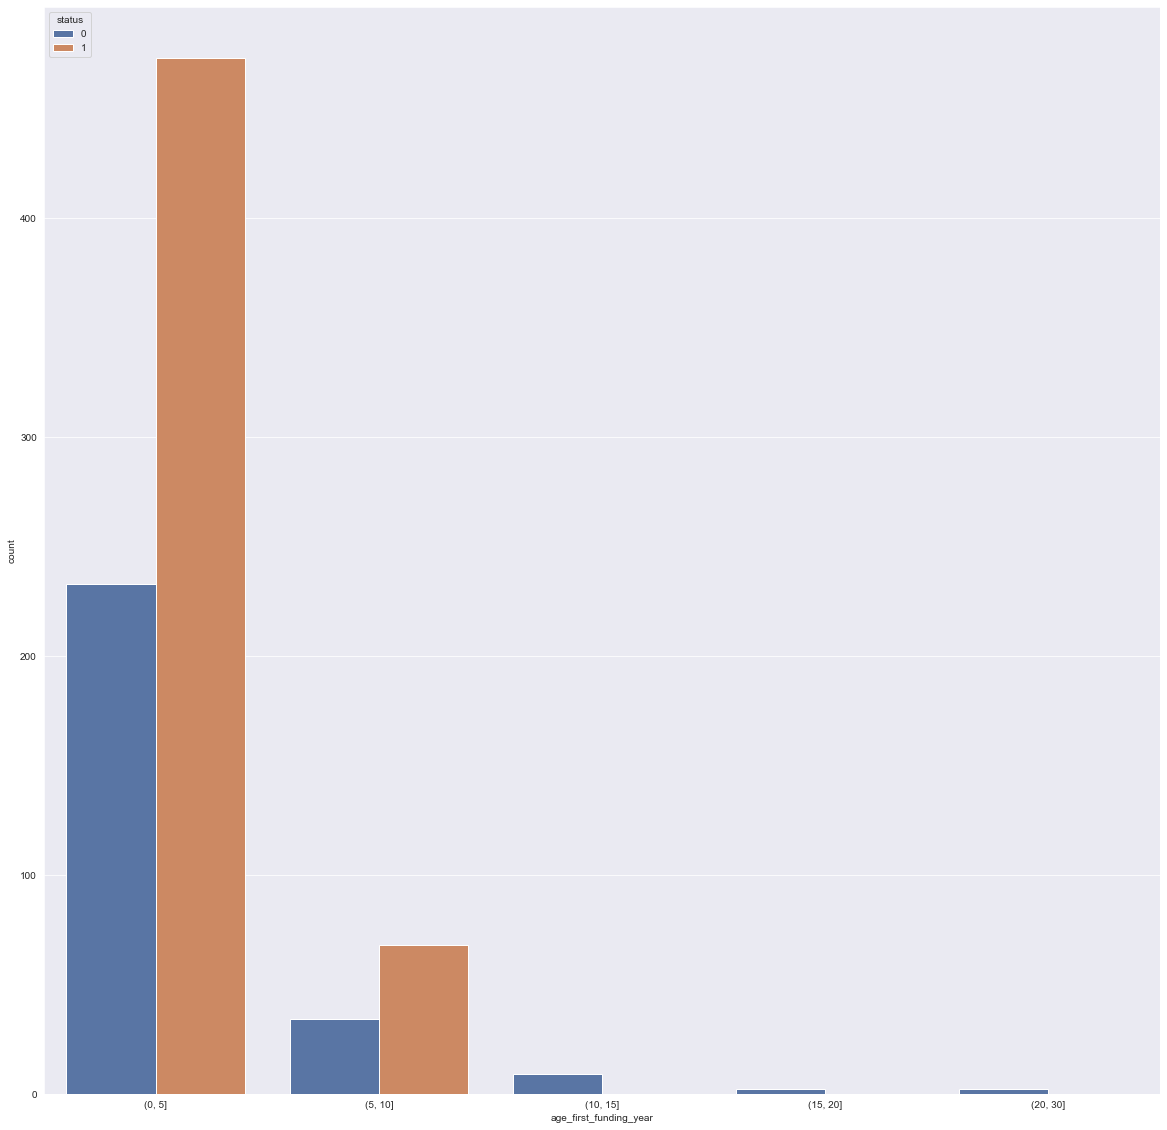

In [33]:
age_bins = pd.cut(startup["age_first_funding_year"], [0,5,10,15,20,30])
sns.countplot(x = age_bins, data = startup, hue = "status")

<AxesSubplot:xlabel='age_first_milestone_year', ylabel='count'>

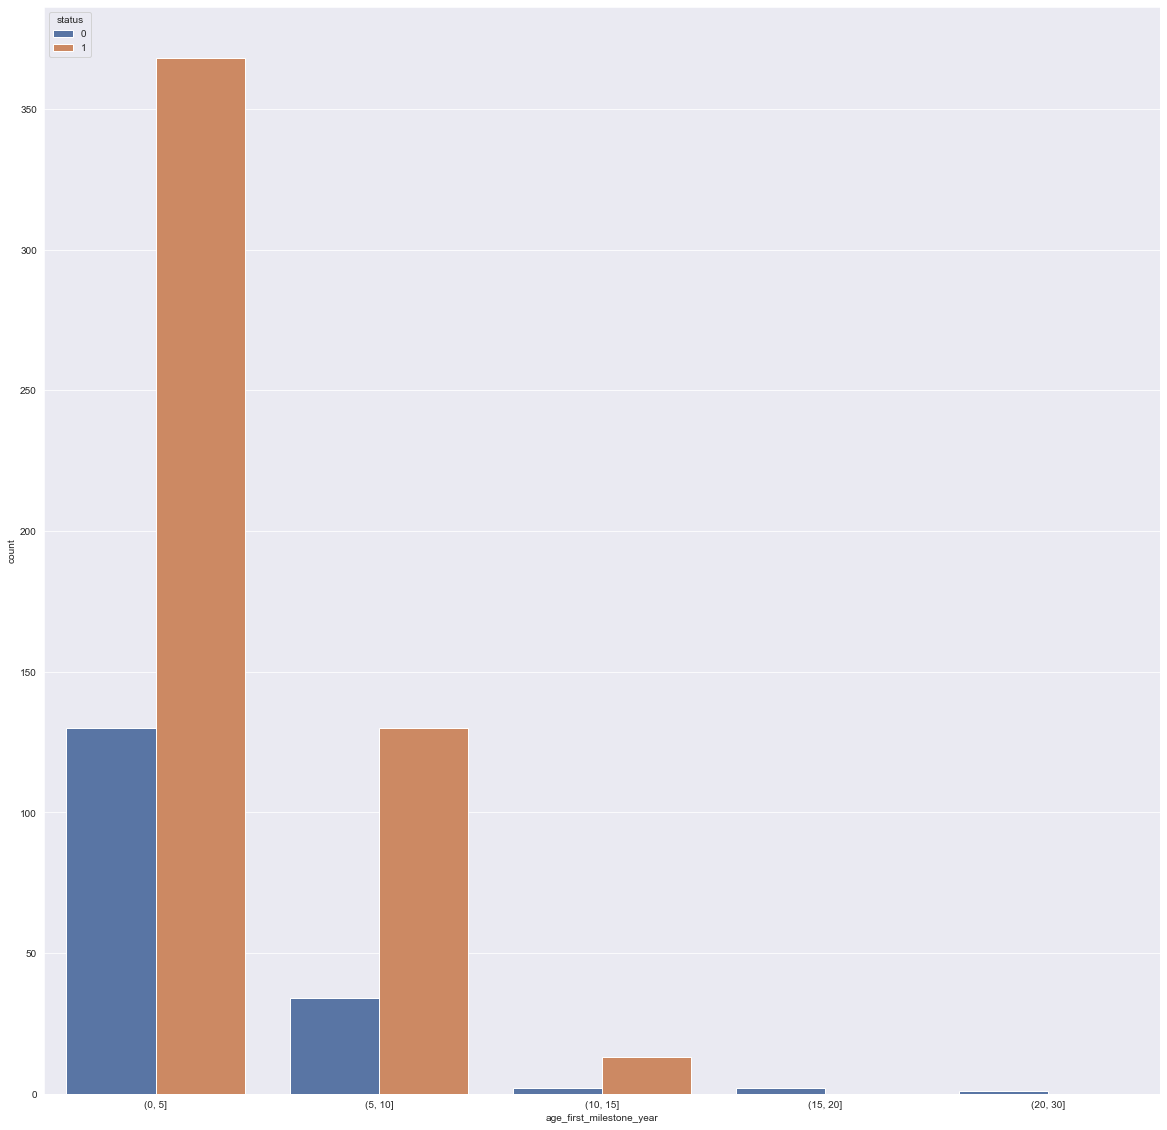

In [34]:
age_milestone_bins = pd.cut(startup["age_first_milestone_year"], [0,5,10,15,20,30])
sns.countplot(x = age_milestone_bins, data = startup, hue = "status")

In [35]:
startup["milestones"].unique()

array([3, 1, 2, 4, 0, 5, 6, 8], dtype=int64)

<AxesSubplot:xlabel='milestones', ylabel='count'>

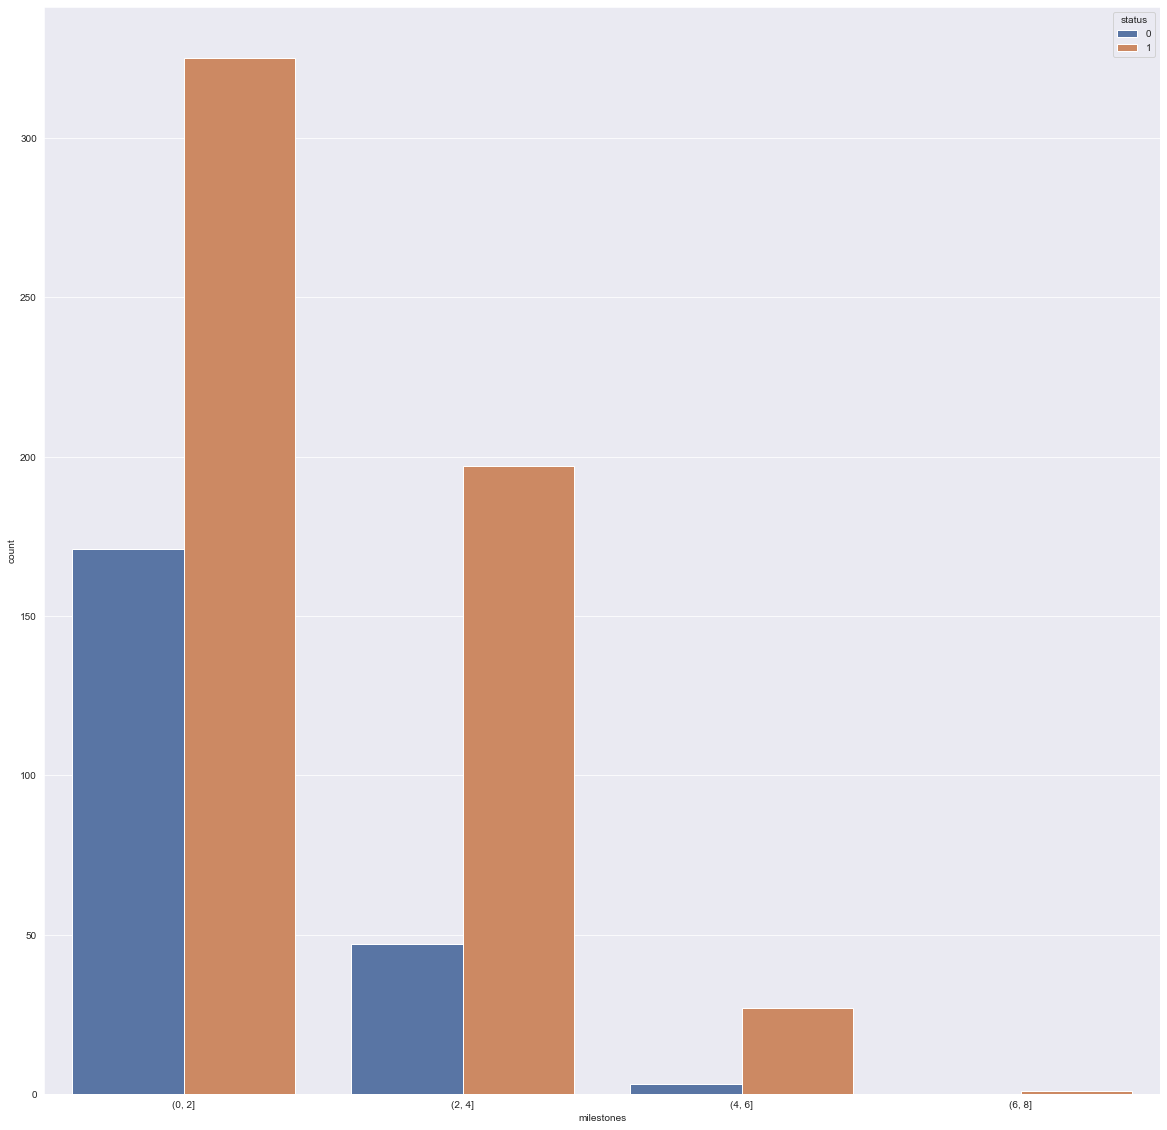

In [36]:
milestone_bins = pd.cut(startup["milestones"], [0,2,4,6,8])
sns.countplot(x = milestone_bins , data = startup, hue = "status")

In [37]:
startup["closed_at"] = startup["closed_at"].fillna(0)
# closed_startups = startup[np.where(startup["closed_at"] == 0)]
closed_startups = startup.loc[np.where(startup["closed_at"] != 0)]

<AxesSubplot:xlabel='Closed_year', ylabel='count'>

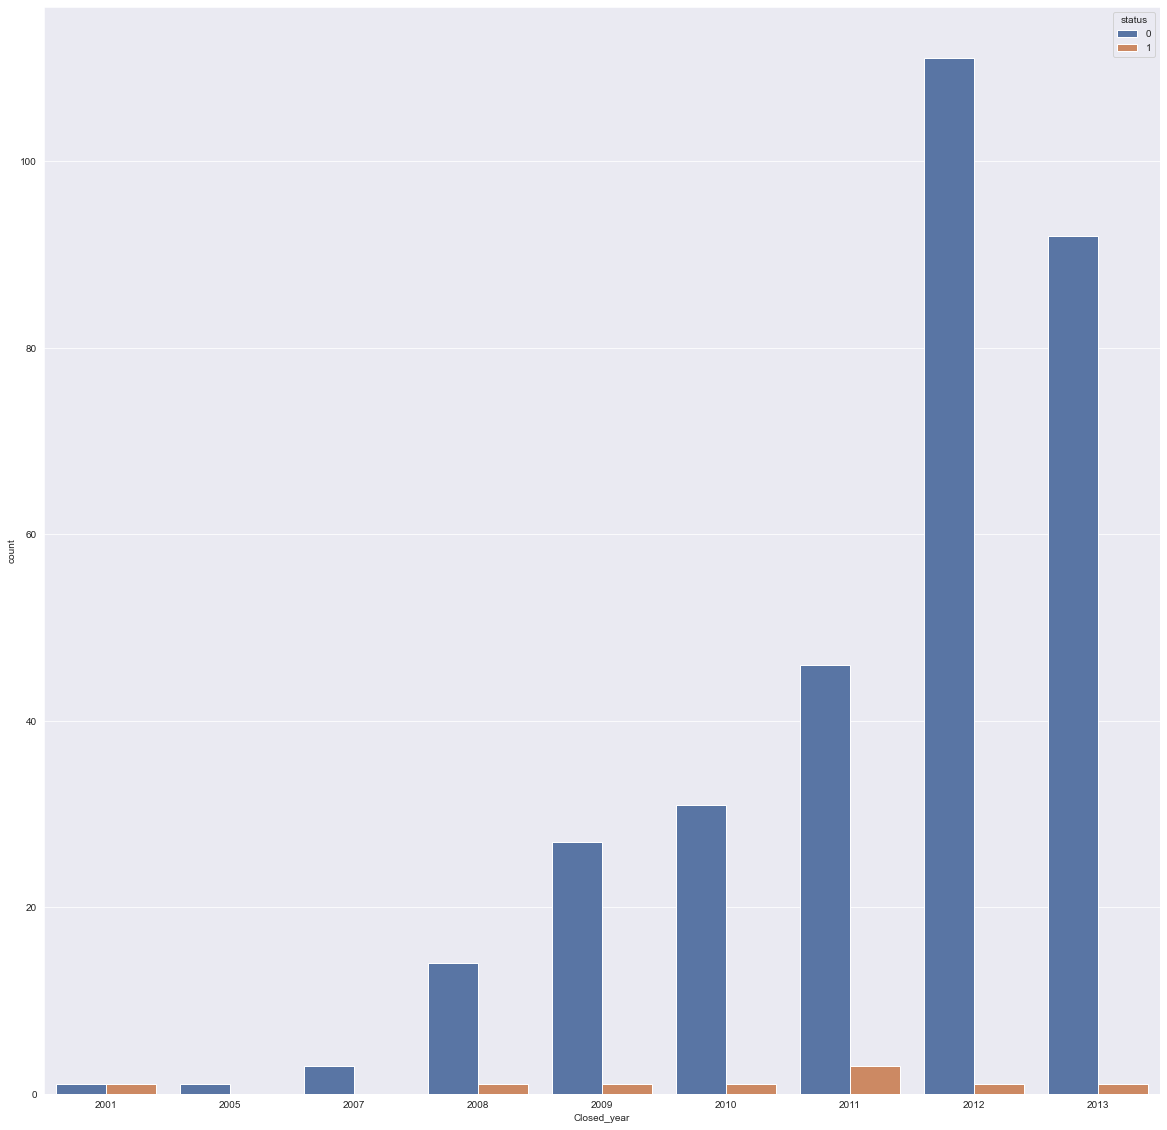

In [38]:
closed_startups["Closed_year"] = pd.DatetimeIndex(closed_startups["closed_at"]).year
sns.countplot(x = "Closed_year", data = closed_startups, hue = "status")

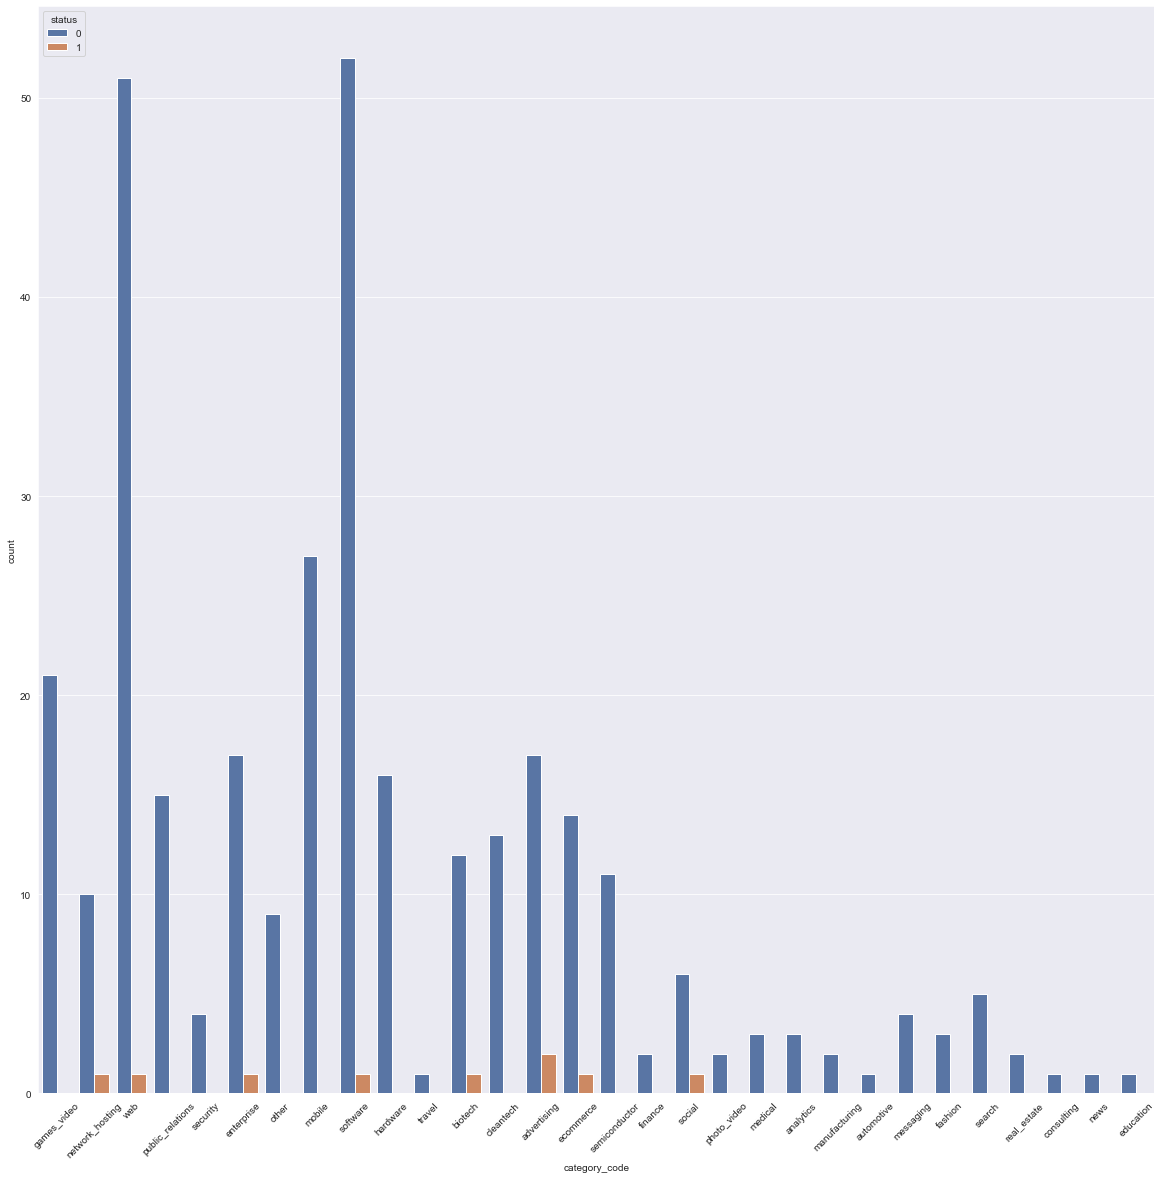

In [39]:
sns.countplot(x = "category_code", data = closed_startups, hue = "status")
plt.xticks(rotation = 45)
plt.show()

# Feature Extraction

In [40]:
"""This was to pick out columns with very correlations with one another, one thing we want to avoid is multicollinearity 
   as its existence affects the model prediction immensely, the other end of the code was to get remove repitition 
   from the list_corr I created from the beginning."""
list_corr = []
for i in startup.corr().index:
    for j in startup.corr().columns:
        if i == j:
            continue
        else:
            if abs(startup.corr()[i][j]) > 0.65:
                list_corr.append([i,j])
                
list_corr_copy = list_corr.copy()
for i in list_corr_copy:
    if i[::-1] in list_corr:
        list_corr.remove(i)

In [41]:
"""So these are the columns with high correlation with one aonther

   For the first pair, I sought to remove the age_first_funding_year after 
   checking the two to see which has the highest correlation with the target, 
   and the age_last_funding_year has higher corr with the target.
   
   For the second pair, I chose to remove the age_first_milestone_year for the same reason as above
   
   For the third pair, I removed the diff_in_fundyears because it was a column i created, 
   it wasnt originally part of the dataset, I felt, sometime in the visualisation process that 
   there might be a lot of story that could be gained from finding the difference in the years from 
   when a startup was first funded and when it was last funded
   and its relationship with the startup's failure and success and we did get a lot from it 
   but i dropped it cos it was a self made column and the funded rounds already gave a very similar response as it would 
   to the target prediction. Although there was a higher correlation from diff_in_fundyears I still prioritise this.
   Its still subject to change.

   For the fourth and fifth pair, I dropped them because the the founded year was a column I created the myself
   This was the get only the year from the founded_at datetime. 
   """
list_corr

[['age_last_funding_year', 'age_first_funding_year'],
 ['age_last_milestone_year', 'age_first_milestone_year'],
 ['diff_in_fundyears', 'funding_rounds'],
 ['Founded_year', 'age_first_funding_year'],
 ['Founded_year', 'age_last_funding_year']]

In [42]:
""" This was to have a view of my dataset again"""
startup.head()

,state_code,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,...,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,diff_in_fundyears,Founded_year,age_diff_in_milestone
0,CA,2007-01-01,0,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,3,...,0,0,0,0,1.0000,0,1,0.752924,2007,2.0356
1,CA,2000-01-01,0,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,9,...,0,1,1,1,4.7500,1,1,4.867999,2000,0.0000
2,CA,2009-03-18,0,2010-03-30,2010-03-30,1.0329,1.0329,1.4575,2.2055,5,...,1,0,0,0,4.0000,1,1,0.000000,2009,0.7480
3,CA,2002-01-01,0,2005-02-17,2007-04-25,3.1315,5.3151,6.0027,6.0027,5,...,0,1,1,1,3.3333,1,1,2.182112,2002,0.0000
4,CA,2010-08-01,2012-10-01 00:00:00,2010-08-01,2012-04-01,0.0000,1.6685,0.0384,0.0384,2,...,0,0,0,0,1.0000,1,0,1.667385,2010,0.0000


In [43]:
"""This was to see my list of columns again"""
startup.columns

Index(['state_code', 'founded_at', 'closed_at', 'first_funding_at',
       'last_funding_at', 'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB',
       'has_roundC', 'has_roundD', 'avg_participants', 'is_top500', 'status',
       'diff_in_fundyears', 'Founded_year', 'age_diff_in_milestone'],
      dtype='object')

In [44]:
"""This was to see the info of all columns again"""
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   state_code                923 non-null    object        
 1   founded_at                923 non-null    datetime64[ns]
 2   closed_at                 923 non-null    object        
 3   first_funding_at          923 non-null    datetime64[ns]
 4   last_funding_at           923 non-null    datetime64[ns]
 5   age_first_funding_year    923 non-null    float64       
 6   age_last_funding_year     923 non-null    float64       
 7   age_first_milestone_year  923 non-null    float64       
 8   age_last_milestone_year   923 non-null    float64       
 9   relationships             923 non-null    int64         
 10  funding_rounds            923 non-null    int64         
 11  funding_total_usd         923 non-null    int64         
 12  milestones            

In [45]:
"""
    Since models cannot run without all columns being numerical and most categorical columns have been one-hot encoded,
    We removed the categorical features, All columns with datatime also removed as we felt like they are not needed, 
    and columns with high correlations were removed as explianed earlier.
"""

new_startup = startup.drop(columns = ["state_code","founded_at","closed_at","first_funding_at",
                        "last_funding_at","category_code","Founded_year","age_first_funding_year",
                                      "age_first_milestone_year", "diff_in_fundyears"])
new_startup.head()

,age_last_funding_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,age_diff_in_milestone
0,3.0027,6.7041,3,3,375000,3,1,0,0,0,...,0,1,0,0,0,0,1.0000,0,1,2.0356
1,9.9973,7.0055,9,4,40100000,1,1,0,0,0,...,1,0,0,1,1,1,4.7500,1,1,0.0000
2,1.0329,2.2055,5,1,2600000,2,1,0,0,0,...,0,0,1,0,0,0,4.0000,1,1,0.7480
3,5.3151,6.0027,5,3,40000000,1,1,0,0,0,...,0,0,0,1,1,1,3.3333,1,1,0.0000
4,1.6685,0.0384,2,2,1300000,1,1,0,0,0,...,1,1,0,0,0,0,1.0000,1,0,0.0000


In [46]:
"""
    A lot of columns have negative values and had outliers so I scaled the the data using minmaxscaler to remove outliers 
    and also negative inputs as totally removing them could be causing excessive leakages in data.
"""
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
scaled_data = Scaler.fit_transform(new_startup)
new_startup = pd.DataFrame(scaled_data, columns = new_startup.columns)

In [47]:
"""
    I split the data into the the target and the columns for prediction
"""
X = new_startup[[col for col in new_startup.columns if col != "status"]]
y = new_startup["status"]

In [48]:
"""
    Importing the functions we agreed to use for the feature extraction, all as seen below
"""
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier

In [49]:
"""
 How to use SelectKBest and f_classif and the features the rank as top 20 affecting the target
"""
feats = SelectKBest(score_func = f_classif, k = 20)
feats.fit(X,y)
X_new = pd.Series(feats.scores_, index = [i for i in X.columns if i != "status"])
X_new.nlargest(20).index

Index(['relationships', 'age_last_milestone_year', 'milestones', 'is_top500',
       'age_diff_in_milestone', 'has_roundB', 'funding_rounds',
       'avg_participants', 'has_roundA', 'is_otherstate', 'has_roundC',
       'has_roundD', 'is_MA', 'is_CA', 'is_enterprise',
       'age_last_funding_year', 'has_angel', 'is_ecommerce', 'is_NY',
       'has_VC'],
      dtype='object')

In [50]:
"""
    How to use mutual_info_classif and its top 20 columns affecting the target
"""
mutual_info = mutual_info_classif(X,y, random_state = 10)
mutual_feats = pd.Series(mutual_info, index = [i for i in X.columns if i != "status"])
mutual_feats.sort_values(ascending = True)
mutual_feats.nlargest(20).index

Index(['relationships', 'age_last_milestone_year', 'milestones',
       'funding_total_usd', 'is_top500', 'avg_participants',
       'age_diff_in_milestone', 'has_roundC', 'age_last_funding_year',
       'is_mobile', 'has_roundA', 'has_roundB', 'is_CA', 'is_otherstate',
       'funding_rounds', 'is_biotech', 'is_gamesvideo', 'is_consulting',
       'has_angel', 'has_roundD'],
      dtype='object')

In [51]:
"""
    How to use ExtraTreeClassifier 
"""
extra = ExtraTreeClassifier(max_depth = 3)
extra.fit(X,y)
extra_feats = extra.feature_importances_
extra_features = pd.Series(extra_feats, index =  X.columns)
extra_features.nlargest(20)

relationships              0.855163
is_top500                  0.081059
has_roundD                 0.025205
funding_rounds             0.018441
is_ecommerce               0.016012
is_othercategory           0.002786
is_otherstate              0.001335
age_last_funding_year      0.000000
age_last_milestone_year    0.000000
funding_total_usd          0.000000
milestones                 0.000000
is_CA                      0.000000
is_NY                      0.000000
is_MA                      0.000000
is_TX                      0.000000
is_software                0.000000
is_web                     0.000000
is_mobile                  0.000000
is_enterprise              0.000000
is_advertising             0.000000
dtype: float64

In [52]:
"""
I did a train test split with 80 - 20 split
"""
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

In [89]:
"""
 These was to use the top 20 defined by the first method, select KBest
"""

X_new = X[['relationships', 'age_last_milestone_year', 'milestones', 'is_top500',
       'age_diff_in_milestone', 'has_roundB', 'funding_rounds',
       'avg_participants', 'has_roundA', 'is_otherstate', 'has_roundC',
       'has_roundD', 'is_MA', 'is_CA', 'is_enterprise', 'is_mobile',
       'age_last_funding_year', 'has_angel', 'is_ecommerce', 'is_NY',
       'has_VC','funding_total_usd', 'is_biotech', 'is_gamesvideo', 'is_consulting',"is_software"]]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_new,y, test_size = 0.2, random_state = 10)

In [90]:
"""
    Like Isreal suggested for us to first of all, run a model and see how it performs and to see areas where we can work on,
    Although that will be covered in the later section of this schedule, 
    but here is a logistic regression model and 0.71 is quite a good score.
"""
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
accuracy_score(y_test, log_pred)

0.7189189189189189

In [108]:
"""
    So as you can see the model built with the selected features did better than the one with all the columns
    This doesnt always work and i try to use the whole dataset ven in cases where i have perfomred fearure selection. 
    The priority is which gives the highest prediction score
"""
log_model_1 = log_model.fit(X_train1, y_train1)
log_pred_new = log_model_1.predict(X_test1)
print(accuracy_score(y_test1, log_pred_new))

print(classification_report(y_test1, log_pred_new))
print()
print(confusion_matrix(y_test1, log_pred_new))

0.7135135135135136
              precision    recall  f1-score   support

         0.0       0.67      0.49      0.56        70
         1.0       0.73      0.85      0.79       115

    accuracy                           0.71       185
   macro avg       0.70      0.67      0.67       185
weighted avg       0.71      0.71      0.70       185


[[34 36]
 [17 98]]


<AxesSubplot:>

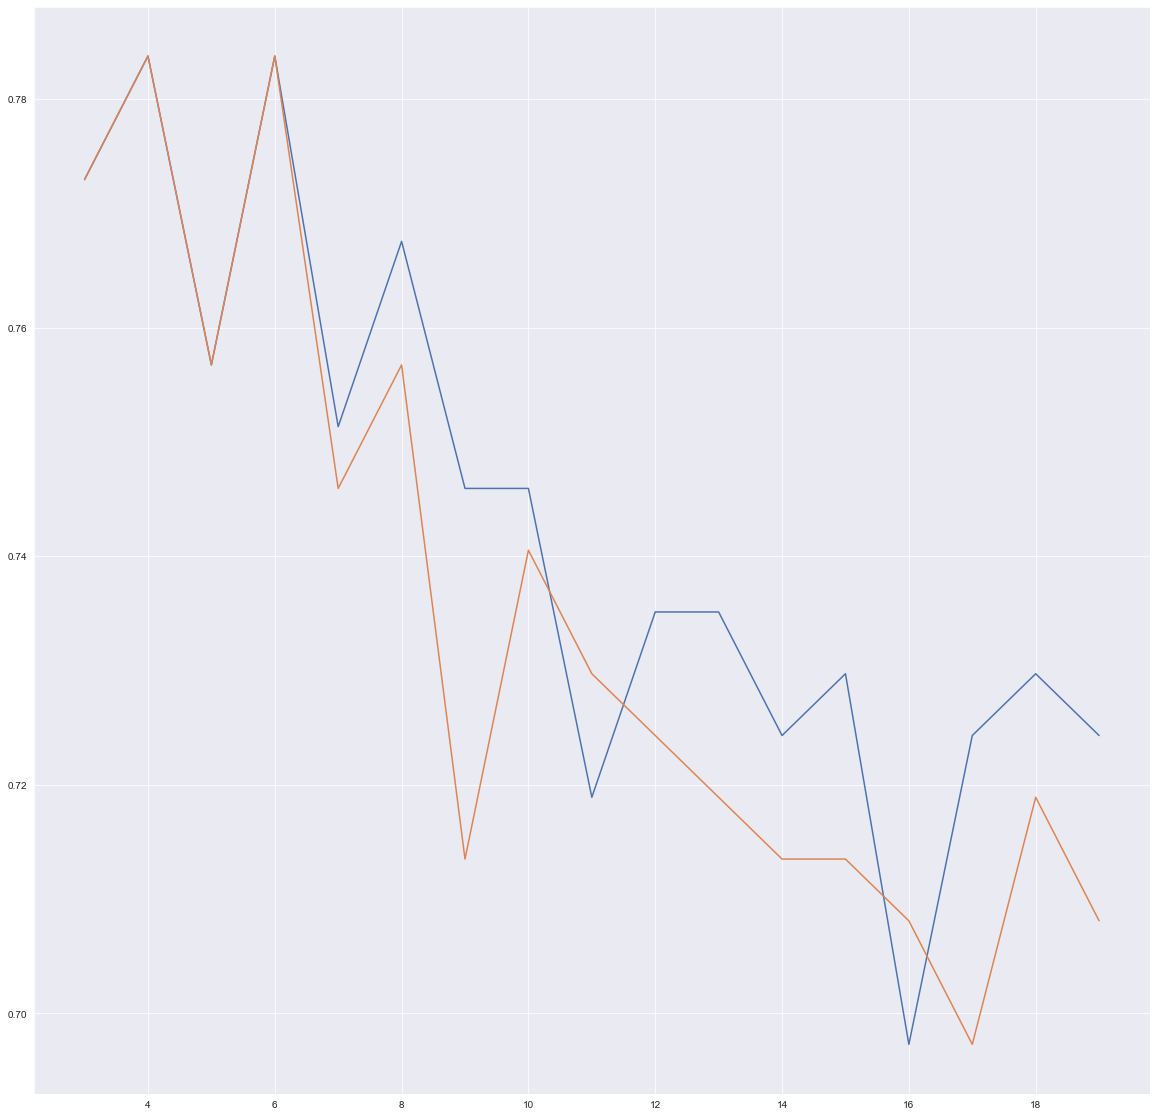

In [92]:
list_scores = []
lst_scr = []
for i in range(3,20):
    trees_model = DecisionTreeClassifier(max_depth = i, random_state = 10)
    trees_model.fit(X_train, y_train)
    trees_pred = trees_model.predict(X_test)
    list_scores.append(accuracy_score(y_test, trees_pred))
    
    trees_model_1 = DecisionTreeClassifier(max_depth = i, random_state = 10)
    trees_model_1.fit(X_train1, y_train1)
    trees_pred_1 = trees_model_1.predict(X_test1)
    lst_scr.append(accuracy_score(y_test1, trees_pred_1))
    
sns.lineplot(x = range(3,20), y = list_scores)
sns.lineplot(x = range(3,20), y = lst_scr)

In [100]:
trees_model_1 = DecisionTreeClassifier(max_depth = 4, random_state = 10)
trees_model_1.fit(X_train1, y_train1)
trees_pred_1 = trees_model_1.predict(X_test1)
print(accuracy_score(y_test1, trees_pred_1))

print(classification_report(y_test1, trees_pred_1))
print(confusion_matrix(y_test1, trees_pred_1))

0.7837837837837838
              precision    recall  f1-score   support

         0.0       0.97      0.44      0.61        70
         1.0       0.75      0.99      0.85       115

    accuracy                           0.78       185
   macro avg       0.86      0.72      0.73       185
weighted avg       0.83      0.78      0.76       185

[[ 31  39]
 [  1 114]]


<AxesSubplot:>

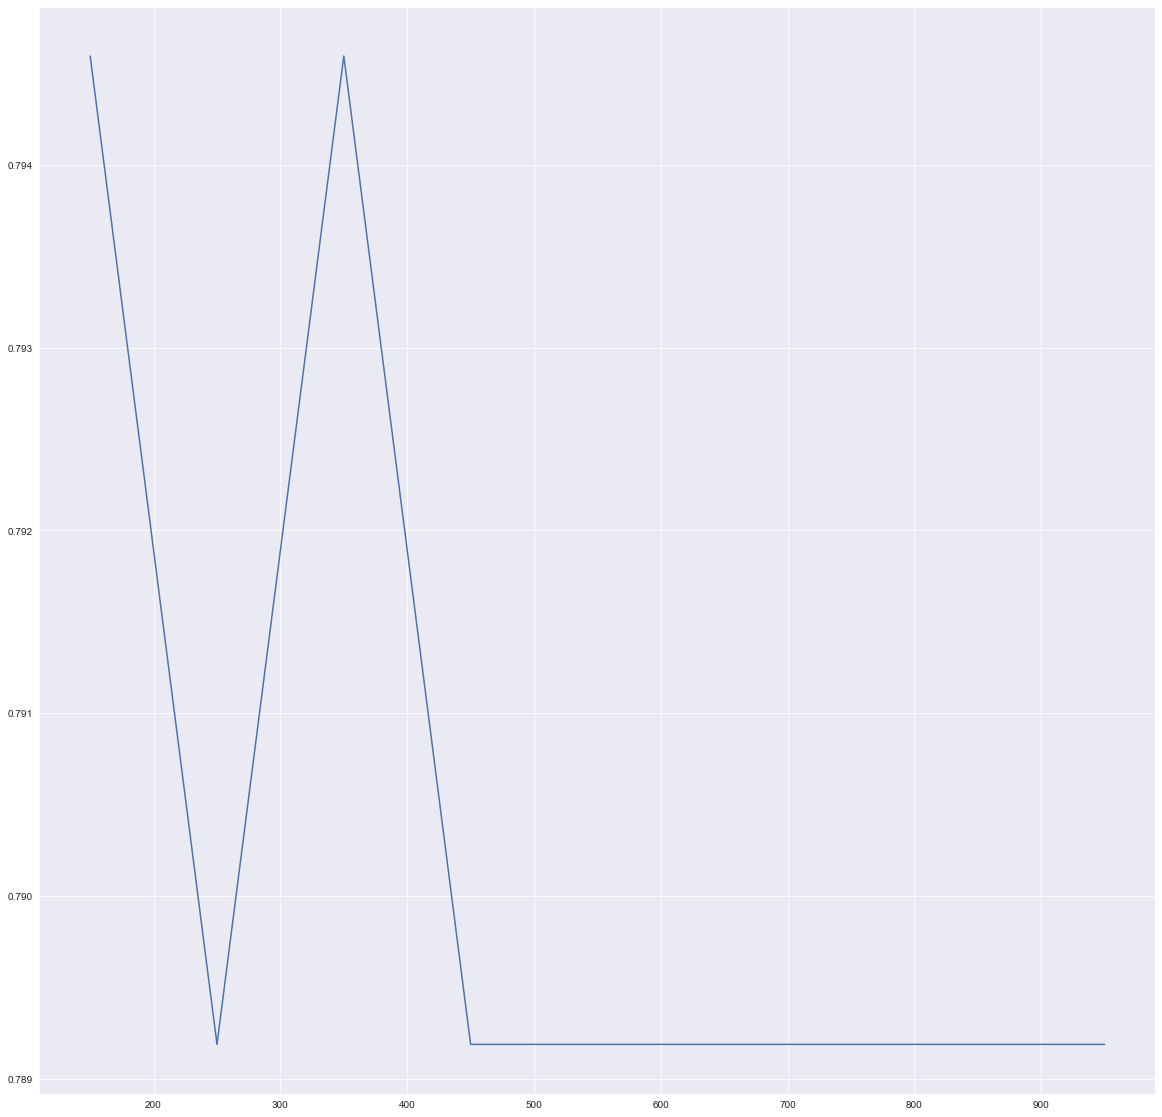

In [94]:
from sklearn.ensemble import RandomForestClassifier
radn_scores = []
for i in range(150,1000,100):
    radn_model = RandomForestClassifier(max_depth = 5, n_estimators = i, random_state = 10, n_jobs = -1)
    radn_model.fit(X_train1, y_train1)
    radn_model_pred = radn_model.predict(X_test1)
    radn_scores.append(accuracy_score(y_test1, radn_model_pred))

sns.lineplot(x = range(150,1000,100), y = radn_scores)
# print(classification_report(y_test1, radn_model_pred))
# print(confusion_matrix(y_test1, radn_model_pred))

In [95]:
params = {"n_estimators": range(150,1000,100),
         "max_depth": range(3,10,1)}
grid_search = GridSearchCV(RandomForestClassifier(random_state = 10), cv = 5, 
                           scoring = "f1", param_grid = params, n_jobs = -1)
grid_search.fit(X_train1, y_train1)
grid_search.best_params_

{'max_depth': 8, 'n_estimators': 450}

In [106]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
radn_model = RandomForestClassifier(max_depth = 5, n_estimators = 350, random_state = 10, n_jobs = -1)
radn_model.fit(X_train1, y_train1)
radn_model_pred = radn_model.predict(X_test1)
print(accuracy_score(y_test1, radn_model_pred))

print(classification_report(y_test1, radn_model_pred))
print(confusion_matrix(y_test1, radn_model_pred))

0.7945945945945946
              precision    recall  f1-score   support

         0.0       0.90      0.51      0.65        70
         1.0       0.77      0.97      0.85       115

    accuracy                           0.79       185
   macro avg       0.83      0.74      0.75       185
weighted avg       0.82      0.79      0.78       185

[[ 36  34]
 [  4 111]]


In [97]:
import xgboost as xgb
xgboost = xgb.XGBClassifier(n_estimators = 800, n_jobs = -1, learning_rate = 0.6,eval_metric = "error",random_state = 10)
xgboost.fit(X_train, y_train)
xgb_pred = xgboost.predict(X_test)
print(accuracy_score(y_test, xgb_pred))

print(classification_report(y_test, xgb_pred))
print(confusion_matrix(y_test, xgb_pred))

0.7837837837837838
              precision    recall  f1-score   support

         0.0       0.83      0.54      0.66        70
         1.0       0.77      0.93      0.84       115

    accuracy                           0.78       185
   macro avg       0.80      0.74      0.75       185
weighted avg       0.79      0.78      0.77       185

[[ 38  32]
 [  8 107]]


In [98]:
from sklearn.naive_bayes import GaussianNB
bayes_model = GaussianNB()
bayes_model.fit(X_train1, y_train1)
bayes_pred = bayes_model.predict(X_test1)
print(accuracy_score(y_test1, bayes_pred))

print(classification_report(y_test1, bayes_pred))
print(confusion_matrix(y_test1, bayes_pred))

0.6594594594594595
              precision    recall  f1-score   support

         0.0       0.54      0.74      0.62        70
         1.0       0.80      0.61      0.69       115

    accuracy                           0.66       185
   macro avg       0.67      0.68      0.66       185
weighted avg       0.70      0.66      0.66       185

[[52 18]
 [45 70]]


In [103]:
params_grid = {"n_estimators": range(150,1000,100),
         "max_depth": range(3,10,1),
         "learning_rate": np.arange(0.01,0.1,0.01)}
grid_search = GridSearchCV(GradientBoostingClassifier(random_state = 10), cv = 5, 
                           scoring = "f1", param_grid = params_grid , n_jobs = -1)
grid_search.fit(X_train1, y_train1)
grid_search.best_params_

{'learning_rate': 0.08, 'max_depth': 7, 'n_estimators': 350}

In [107]:
Grad_boost = GradientBoostingClassifier(n_estimators = 350, learning_rate = 0.2, max_depth = 5, random_state = 10)
Grad_boost.fit(X_train1, y_train1)
grad_pred = Grad_boost.predict(X_test1)

print(accuracy_score(y_test1, grad_pred))
print(classification_report(y_test1, grad_pred))
print(confusion_matrix(y_test1, grad_pred))

0.7783783783783784
              precision    recall  f1-score   support

         0.0       0.87      0.49      0.62        70
         1.0       0.75      0.96      0.84       115

    accuracy                           0.78       185
   macro avg       0.81      0.72      0.73       185
weighted avg       0.80      0.78      0.76       185

[[ 34  36]
 [  5 110]]


In [ ]:
ada_radn = AdaBoostClassifier(radn_model, n_estimators = 100, learning_rate = 0.1)
ada_radn.